# MNIST

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.



In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Load the dataset from Kearas

Keras 本身就包了 MNIST 這個手寫數字的資料集，我們透過底下的方式將之載入。

The Keras deep learning library provides a convenience method for loading the MNIST dataset.

The dataset is downloaded automatically the first time this function is called and is stored in your home directory in ~/.keras/datasets/mnist.pkl.gz as a 15MB file.

In [0]:
from tensorflow.keras.datasets import mnist

## Split the dataset into training set and testing set

Load data and split the dataset into the training set and the testing set.  
x_train contains handwriting images.
y_train contains the corresponding tag for each handwriting image.

將資料集載入，並分割成「訓練集」以及「測試集」。  
訓練集中， x_train 是手寫圖片的資料。  
y_train 則是每個手寫數字的「標籤」。

同理 x_test 是測試集中的手寫數字圖片。  
而 y_test 則是測試集中每個數字的標籤。

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Checkout the data stored in the training/testing dataset

We can print out the data stored in the train and test datasets.

We can also visualize the handwriting digits using matplotlib.

我們可以使用 matplotlib 的功能，把資料集中的數字給畫出來。

In [27]:
print(f'The shape of x_train is {x_train.shape}')
print(f'X_train contains {x_train.shape[0]} pictures.')
print(f'Each pic in x_train is a {x_train.shape[1]} X {x_train.shape[2]} figure.')

The shape of x_train is (60000, 28, 28)
X_train contains 60000 pictures.
Each pic in x_train is a 28 X 28 figure.


In [28]:
print(f'The shape of y_train is {y_train.shape}')
print(f'There are {y_train.shape[0]} items in the y_train.')

The shape of y_train is (60000,)
There are 60000 items in the y_train.


In [29]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Observation (觀察)

We found the value range of each item in $x\_train[i]$ is within $[0, 255]$.  
0 is black and 255 is white.

$x\_train[i]$ 中的資料的值都介於 0 到 255 間。  
它們是灰階的資料，0 代表全黑，255 代表全白。

## Use imshow to visualize the image in the x_train dataset

[imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) displaies data as an image; i.e. on a 2D regular raster.

cmap = 'gray' means you want to draw the image in the gray mode.

imshow 可以將資料以 2D 圖片的方式繪出。  
底下程式碼中， cmap = 'gray' 代表以灰階的方式繪出。  
如果不指定的話，預設是用彩色的方式顯示出來。



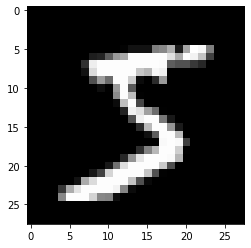

In [30]:
plt.imshow(x_train[0], cmap='gray')

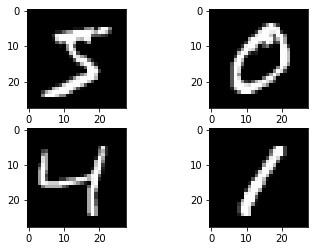

In [31]:
#Draw the previous 4 images in the x_train dataset
plt.subplot(2,2,1)
plt.imshow(x_train[0], cmap='gray')
plt.subplot(2,2,2)
plt.imshow(x_train[1], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(x_train[2], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(x_train[3], cmap='gray')

## Show the tags stored in the y_train

In [32]:
#Show the previous 4 tags in the y_train dataset
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

5
0
4
1


## Normalization of the dataset

將資料正規化，把所有的值都縮放到 $[0, 1]$ 之間。

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

TypeError: ignored

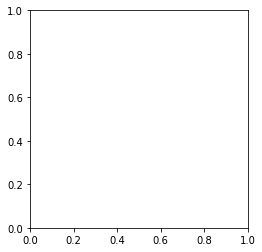

In [55]:
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

In [34]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Reshape a 2D array to a 1D array

Since the DNN network accepts a one-dimensional array as its input,
we need to transfor the 2D graph into a one-dimensional array.

Each image is a $28 \times 28$ 2D array (i.e., its shape is (28, 28)).  
We transfor it to a one-dimensional vector that contains 784 elements ($28\times 28 = 784$). 

因為 DNN 在輸入層，是以 1 維的向量做為輸入。  
但我們的圖片是 2 維的陣列。  
所以我們要將 2 維的陣列，轉成 1 維的向量。
影像是 $28\times28$ 的 2 維陣列。  
我們將之轉為 1 維向量，其包含了 784 個元素。


In [0]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [36]:
print(f'The shape of x_train is {x_train.shape}')
print(f'The shape of x_test is {x_test.shape}')

The shape of x_train is (60000, 784)
The shape of x_test is (10000, 784)


## Conver a label to a probability vector

We use ``one-hot encoding`` to encode a label to a probability vector.  
The vector contains 10 elements in which each element represents the probability of the corresponding handwriting digit. 

將每個標籤 (label) 轉成一個機率向量。  
原本每個影像都對應到一個標籤。  
因為我們要處理的是分類問題。  
在這個例子中，我們共有 10 種分類 (即數字 0~9)。  
所以將每一個標籤都對應成一個機率的向量。  
例如：

- 0 transfers to $[1,0,0,0,0,0,0,0,0,0]$
- 1 transfers to $[0,1,0,0,0,0,0,0,0,0]$
- 2 transfers to $[0,0,1,0,0,0,0,0,0,0]$
- 3 transfers to $[0,0,0,1,0,0,0,0,0,0]$
- 4 transfers to $[0,0,0,0,1,0,0,0,0,0]$
- ...
- 8 transfers to $[0,0,0,0,0,0,0,0,1,0]$
- 9 transfers to $[0,0,0,0,0,0,0,0,0,1]$

因此，我們使用 ``one-hot encode`` 的方式來編碼。


In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [39]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Construct the neural network

There are three layers of the nerual network.  
The input layer has $28 \times 28$ units for input.  
The output layer has 10 neurons.  
Each neuron represents the probability of the corresponding digit. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()
#first input layer
model.add(keras.layers.Dense(256, input_dim=28*28, activation='relu'))
#second hidden layer
model.add(keras.layers.Dense(512, activation='relu'))
#output layer
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
h = model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9323
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9729
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9824
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0327 - accuracy: 0.9893
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9935
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 0.9956

## Draw the training result

Text(0.5, 1.0, 'Accuracy')

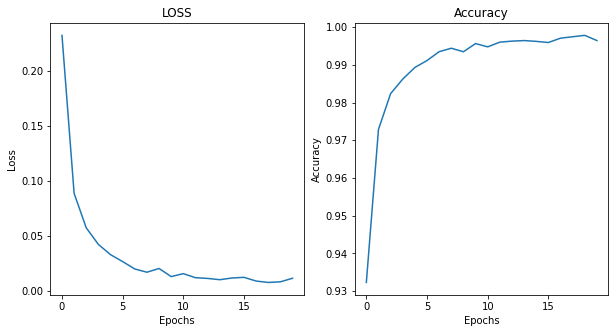

In [44]:
import seaborn as sns
loss = h.history['loss']
acc = h.history['accuracy']
epochs = np.arange(0, 20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(x = epochs, y = loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LOSS')
plt.subplot(1,2,2)
sns.lineplot(x = epochs, y = acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')

## Show the accuracy on the test set

In [46]:
r = model.evaluate(x_test, y_test)
print(f'Loss: {r[0]}')
print(f'Accuracy: {r[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9803
Loss: 0.10208234935998917
Accuracy: 0.9803000092506409


## Predict the result

``model.predict`` returns output predictions for the input samples.

``model.predict_classes`` returns the class id for the input samples.

``model.predict`` 回傳樣本中每個元素所屬的類別機率

``model.predict_classes`` 回傳機率最高的類別的編號

Example:

Suppose that ``model.predict`` returns $[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.91]$.  
``model.predict_classes`` returns 9 as 9 has the max probability among all classes. 

In [49]:
y_preds = model.predict(x_test)
print(y_preds[0])

[1.1090530e-18 8.9255513e-13 2.8111258e-14 1.6589957e-11 1.7007376e-17
 6.9537719e-17 4.3758895e-20 1.0000000e+00 1.4545982e-14 3.8065141e-11]


[1.1090530e-18 8.9255513e-13 2.8111258e-14 1.6589957e-11 1.7007376e-17
 6.9537719e-17 4.3758895e-20 1.0000000e+00 1.4545982e-14 3.8065141e-11]
7
True label is 7


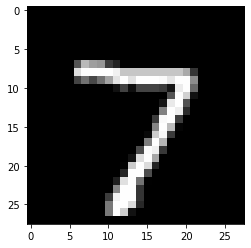

In [54]:
y_pred_classes = model.predict_classes(x_test)
print(y_preds[0])
print(y_pred_classes[0])
print(f'True label is {np.argmax(y_test[0])}')
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [70]:
y_test_classes = np.argmax(y_test, axis=1)
comp = np.equal(y_test_classes, y_pred_classes)
e, ec = np.unique(comp, return_counts=True)
print(e)
print(ec)
for i in range(len(comp)):
  if comp[i] == False:
    print(f'第 {i} 張照片，預測為 {y_pred_classes[i]} 實際為 {y_test_classes[i]}')

[False  True]
[ 197 9803]
第 115 張照片，預測為 9 實際為 4
第 241 張照片，預測為 8 實際為 9
第 247 張照片，預測為 2 實際為 4
第 321 張照片，預測為 7 實際為 2
第 340 張照片，預測為 3 實際為 5
第 445 張照片，預測為 0 實際為 6
第 495 張照片，預測為 0 實際為 8
第 582 張照片，預測為 2 實際為 8
第 659 張照片，預測為 1 實際為 2
第 691 張照片，預測為 4 實際為 8
第 707 張照片，預測為 9 實際為 4
第 720 張照片，預測為 8 實際為 5
第 726 張照片，預測為 9 實際為 7
第 760 張照片，預測為 9 實際為 4
第 947 張照片，預測為 9 實際為 8
第 951 張照片，預測為 4 實際為 5
第 1014 張照片，預測為 5 實際為 6
第 1044 張照片，預測為 8 實際為 6
第 1107 張照片，預測為 5 實際為 9
第 1112 張照片，預測為 6 實際為 4
第 1178 張照片，預測為 0 實際為 4
第 1226 張照片，預測為 2 實際為 7
第 1242 張照片，預測為 9 實際為 4
第 1247 張照片，預測為 5 實際為 9
第 1260 張照片，預測為 1 實際為 7
第 1319 張照片，預測為 3 實際為 8
第 1328 張照片，預測為 9 實際為 7
第 1393 張照片，預測為 3 實際為 5
第 1395 張照片，預測為 3 實際為 2
第 1494 張照片，預測為 9 實際為 7
第 1522 張照片，預測為 9 實際為 7
第 1530 張照片，預測為 7 實際為 8
第 1549 張照片，預測為 6 實際為 4
第 1681 張照片，預測為 7 實際為 3
第 1737 張照片，預測為 8 實際為 5
第 1751 張照片，預測為 2 實際為 4
第 1754 張照片，預測為 1 實際為 7
第 1761 張照片，預測為 9 實際為 5
第 1790 張照片，預測為 8 實際為 2
第 1800 張照片，預測為 2 實際為 6
第 1901 張照片，預測為 4 實際為 9
第 2004 張照片，預測為 3 實際為 8
第 2023 張照片，預測為 5 實際為 0
第

第 115 張照片，預測為 9 實際為 4


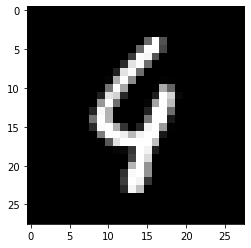

In [72]:
plt.imshow(x_test[115].reshape(28,28), cmap='gray')
print(f'第 {115} 張照片，預測為 {y_pred_classes[115]} 實際為 {y_test_classes[115]}')
